# This page shows some of the waveforms generated using a trained autoencoder

## The waveforms used to train the autoencoder are from:
### 1. Andresen, et al, 2016 (3 waveforms) https://arxiv.org/abs/1607.05199
### 2. Andresen, et al, 2019 (6 waveforms) https://arxiv.org/abs/1810.07638
### 3. Radice, et al, 2019 (5 waveforms) https://arxiv.org/abs/1812.07703
### 4. Ott, et al, 2013 (16 waveforms) https://arxiv.org/abs/1210.6674
###     Ott, et al, 2013 originally only contains 4 waveforms, the extra 12 waveforms are the same wavefomrs as the original 4 waveforms generated at different observing angles.

## The procedure for generating the training data is as follow:
### 1. The waveforms were resampled at 4096Hz 
###     (For Andresen, et al, 2019, the waveforms were originally sampled at ~2000Hz).
### 2. Tukey window with alpha = 0.08 was then applied to waveforms.
### 3. All the waveforms were padded with zeros to make them 2 second long.
### 4. The padding might also happen in the begining of the waveforms as some of them did not originally start at t = 0. 
###     This step was to make sure that all waveforms start at time = zeros, which was also supposed to be the time at bounce.
### 5. To augment the data, 20 times shifts from the range (-0.4s, 0) were applied to the waveforms, increasing the waveform numbers by 20 fold (30 waveforms X 46 time shifts)
### 6. 20 phase shifts from the range (0, pi/6) were applied to the waveforms in the frequency domain, increasing the waveforms by 20 fold (30 waveforms X 20 time shifts X 20 phase shift)
### 7. 20 magnitude scale factors from the range (0.1, 1.0) were applied to the waveforms by multiplying the amplitudes by the scale factors. 
### 8. Step No. 7 makes the total waveform samples equal to 30 waveform X 20 time shifts X 20 phase shifts X 20 scale factors = 240,000 waveforms
### 9. The input parameters for the autoencoder consisted of 3 parts. 
###     The first part was the progenitor model, this includes  (This was inspired by https://arxiv.org/abs/astro-ph/0507135)
###        1. the mass distribution from the core to 2 solar mass  (a 550 element vector)
###        2. the values of radius at each of the 550 elements
###        3. the average electrons per baryon at each of the 550 elements
###        4. the average density at each of the 550 elements
###        5. the mass fraction of silicon (Si28) at each of the 550 elements
###        6. the mass fraction of oxygen (O16) at each of the 550 elements

###      The second part of the input was the EOS (equation of state) (This part of the input was a vector of 13 elements, 6 elements listed below + 7 dummy elements)
###         1. saturation density                       
###         2. the binding energy of nuclear matter
###         3. the skewness of nuclear matter
###         4. the nuclear incompressibility
###         5. the symmetry energy at the saturation density
###         6. the logarithmic derivative of the symmetry energy

###      The third part of the input was simulation specific. (This had been greatly simplified as how this part should be coded up was still not clear)
###         1. the code used to perform the original simulations (prometheus? Fornax? CoCoNuT? etc)
###         2. the code used to deal with the neutrino physics (vertex?)
###         3. the speices of neutrinos in the simulation (νe , ν̄e , and νX?)
###         4. whether approximation scheme "ray by ray" was used (ray by ray or non ray by ray or ray by ray plus?)
###         5. rotation
###         6. observing angle
###         7. neutrino heating
###         8. neutrino cooling

### 10. 2048 of these waveform samples were randomly drawn and used for validation,  237824 for training, and the rest for testing.

## things to note
### 1. compared to the results shown on https://github.com/manleongchan/Super-gen/blob/master/Mar-26-results-on-14-waveforms.ipynb, the results on this page appear to be worse
### 2. that is because of a combination of the following reasons 
###     1. the parameter space was larger (30 waveforms vs 14 waveforms)
###     2. the time shift, phase shift, scale factor all were sampled from a larger range
###     3. the training samples were fewer (240,000 vs 1,362,704)
###     4. probably the input makes less sense than it did before 



## Below are some of the results obtained by applying the trained autoencoder to the test samples.

In [1]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

## Figure 1. 
### a waveform simulated by Andresen_et_al 2016, assuming a protostar of 27 solar mass and no rotation, the waveform is extracted assuming an equatorial observer,
### and the same waveform generated using the trained autoencoder

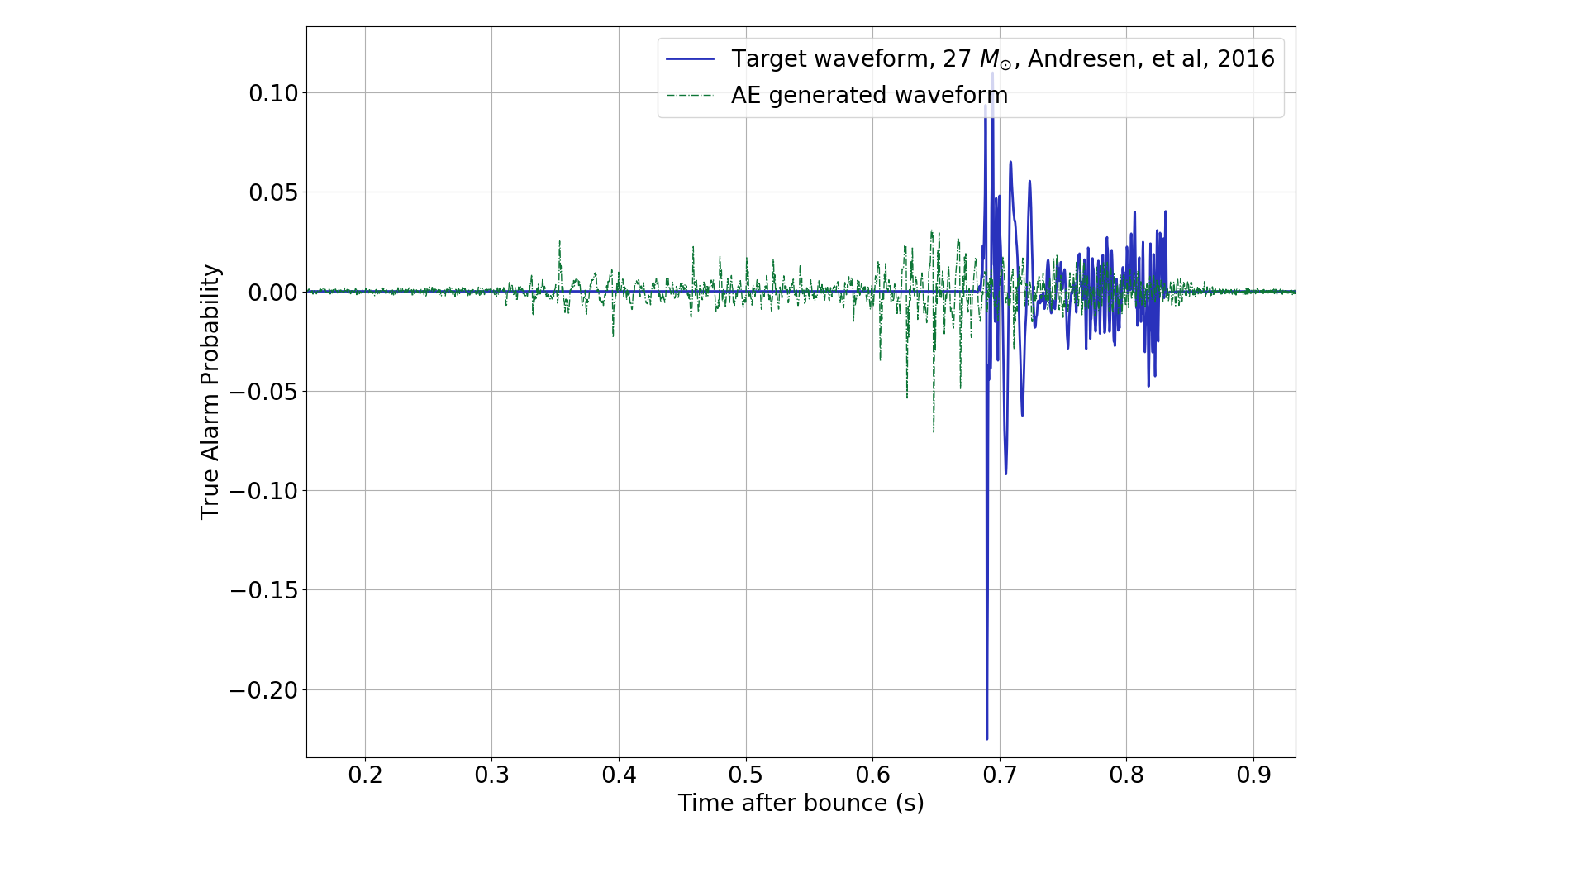

In [2]:
fig = plt.figure(figsize=(43.5,20.25), dpi= 100, facecolor='w', edgecolor='k')
a=fig.add_subplot(1, 2, 1)
x = Image.open('Sept04results/andresen_et_al_2016.png') 
plt.imshow(x)
plt.axis('off')

plt.show()

## Figure 2. 
### a waveform simulated by Andresen_et_al 2019, assuming a protostar of 15 solar mass and 0.5 rads/s, the waveform is extracted assuming an equatorial observer,
### and the same waveform generated using the trained autoencoder

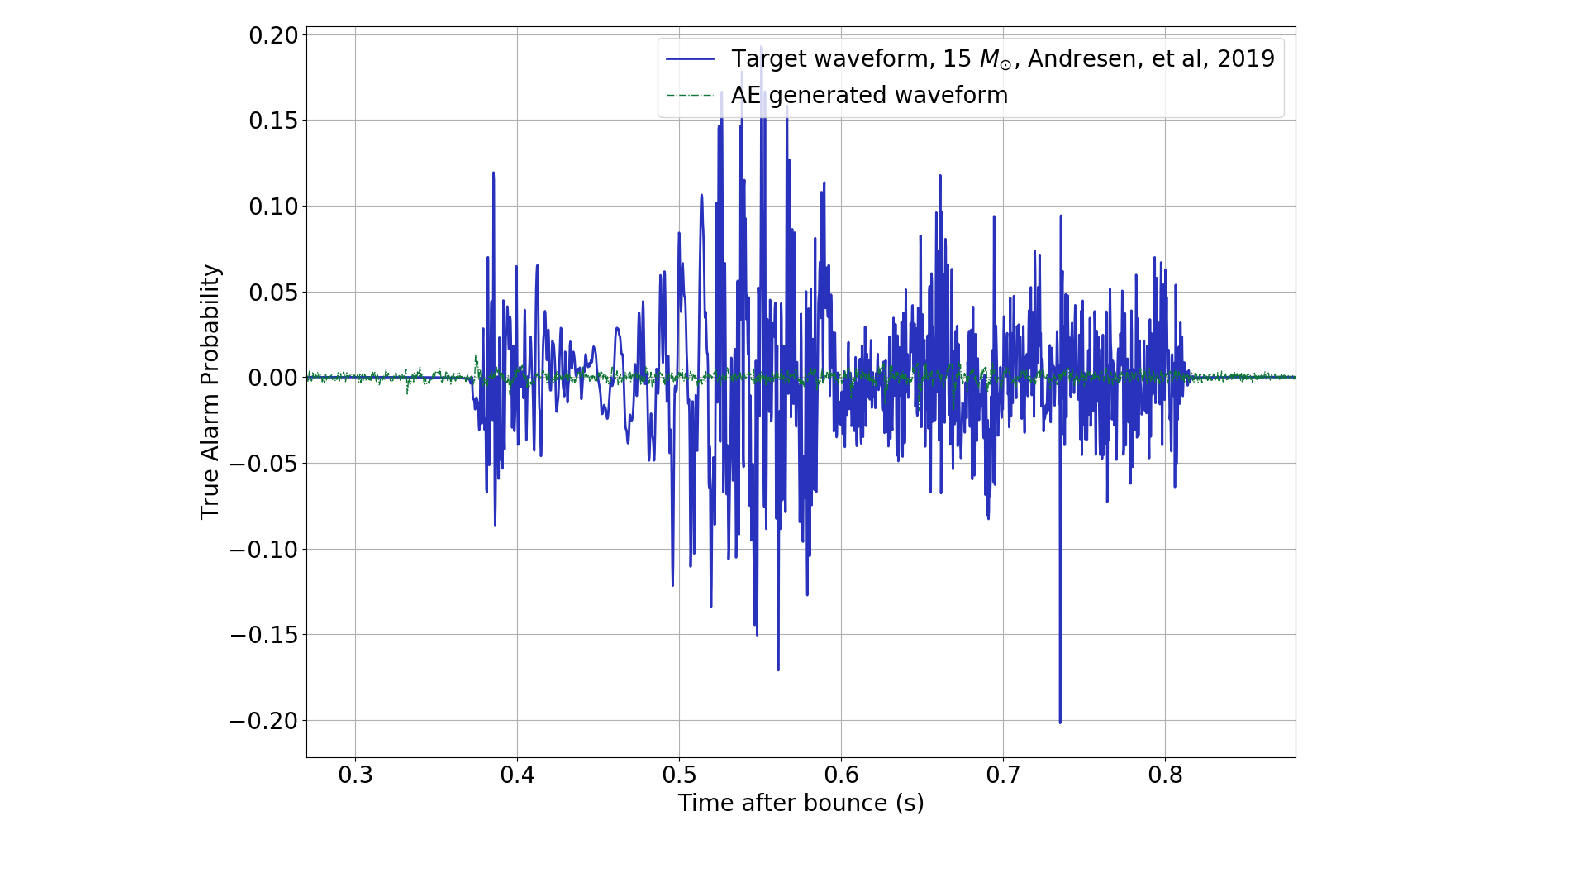

In [4]:
fig = plt.figure(figsize=(43.5,20.25), dpi= 100, facecolor='w', edgecolor='k')
a=fig.add_subplot(1, 2, 1)
x = Image.open('Sept04results/andresen_et_al_2019.png') 
plt.imshow(x)
plt.axis('off')

plt.show()

## Figure 3. 
### a waveform simulated by Radics, et al 2019, assuming a protostar of 19 solar mass and no rotation, the waveform is extracted assuming an equatorial observer,
### and the same waveform generated using the trained autoencoder

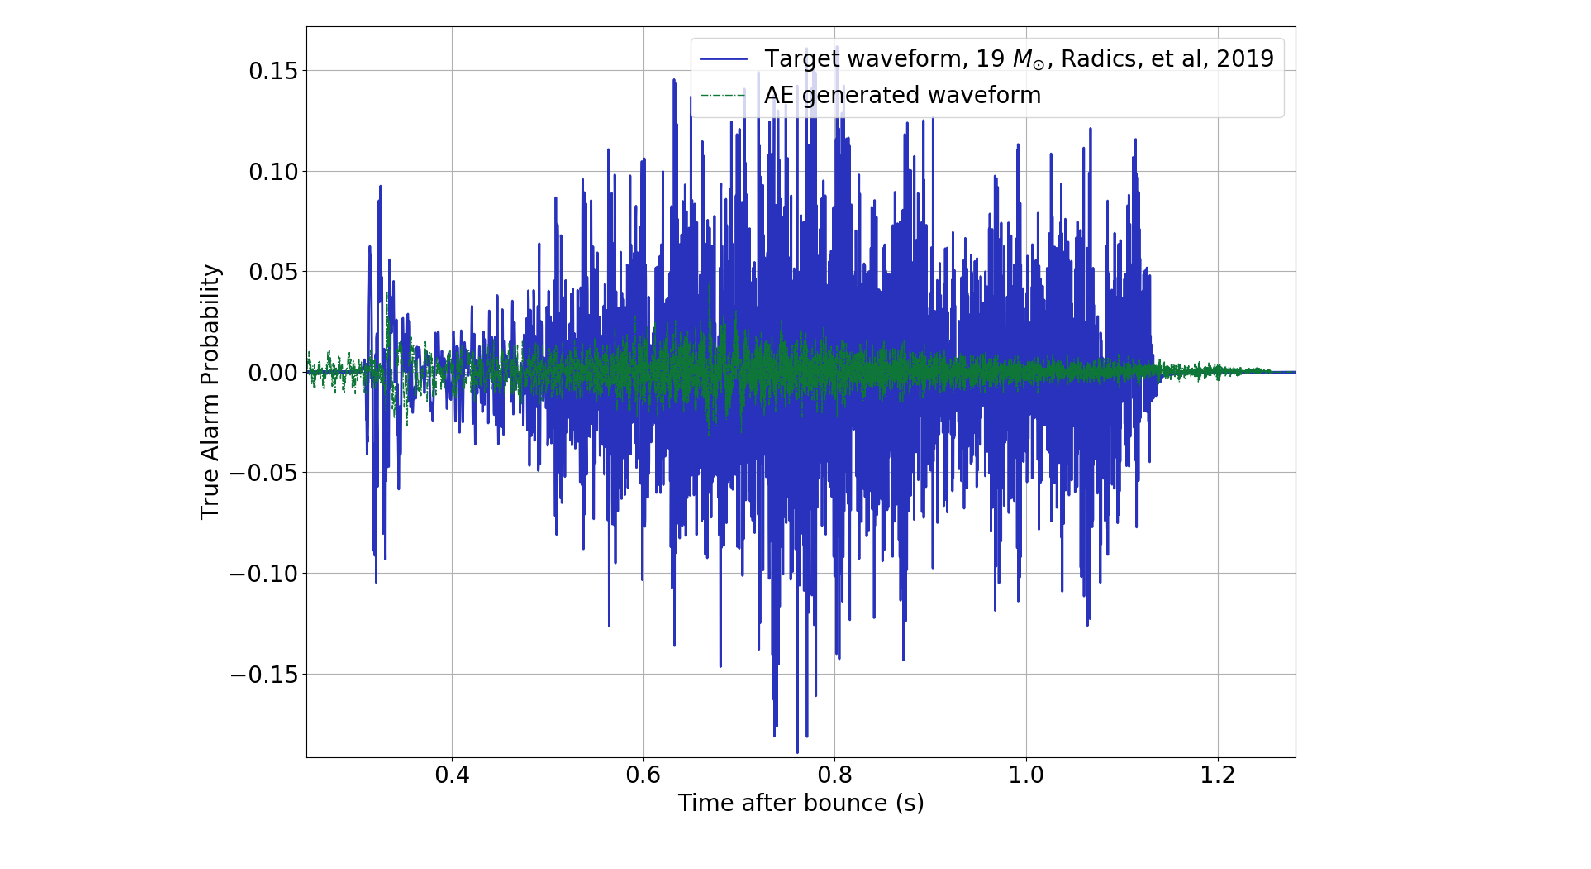

In [5]:
fig = plt.figure(figsize=(43.5,20.25), dpi= 100, facecolor='w', edgecolor='k')
a=fig.add_subplot(1, 2, 1)
x = Image.open('Sept04results/Radice_et_al_2019.png') 
plt.imshow(x)
plt.axis('off')

plt.show()

## Figure 4. 
### a waveform simulated by Ott, et al 2013, assuming a protostar of 27 solar mass and no rotation, the waveform is extracted assuming an observing angle = 30 degress,
### and the same waveform generated using the trained autoencoder

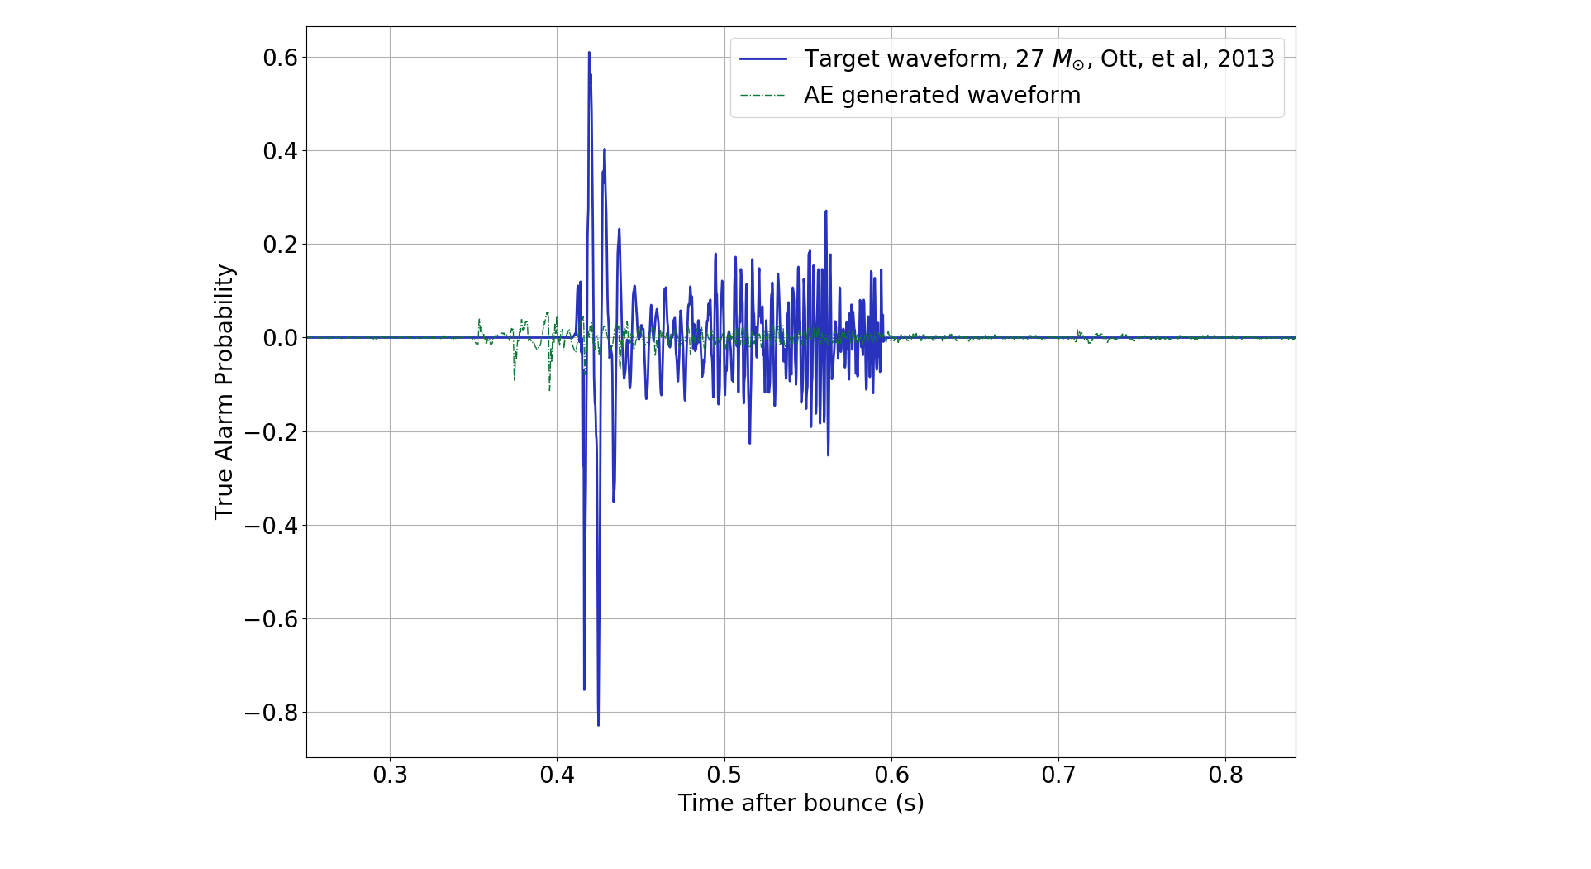

In [7]:
fig = plt.figure(figsize=(43.5,20.25), dpi= 100, facecolor='w', edgecolor='k')
a=fig.add_subplot(1, 2, 1)
x = Image.open('Sept04results/ott_et_al_2013.png') 
plt.imshow(x)
plt.axis('off')

plt.show()